## Import Libraries

In [505]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Plot settings
sns.set(rc= {'figure.figsize': [15, 7]}, font_scale= 1.2)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Reading and Exploring

In [506]:
df = pd.read_csv('./data.csv', delimiter=',', skipinitialspace= True)

In [507]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [509]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [510]:
df.dropna(inplace= True)

In [511]:
df = df.astype({
    'CryoSleep': np.object0,
    'VIP': np.object0,
    'Transported': np.object0
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   object 
dtypes: float64(6), object(8)
memory usage: 774.1+ KB


In [512]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [513]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [514]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1861,1983_01,Earth,False,G/320/P,PSO J318.5-22,17.0,False,414.0,0.0,139.0,28.0,173.0,Felia Cooperkins,False
6310,6672_03,Mars,False,E/424/P,PSO J318.5-22,30.0,False,77.0,71.0,1147.0,0.0,0.0,Sweal Deva,False
3468,3733_01,Europa,False,D/118/S,TRAPPIST-1e,34.0,True,0.0,4.0,0.0,685.0,1779.0,Dilatik Semootor,False
5464,5825_01,Europa,False,B/198/P,TRAPPIST-1e,43.0,False,0.0,8808.0,0.0,580.0,0.0,Betenar Apenelexy,True
787,0825_01,Earth,True,G/120/P,TRAPPIST-1e,13.0,False,0.0,0.0,0.0,0.0,0.0,Alendy Wardendez,True


## Data visualization

Text(0.5, 1.0, 'How many passengers got transported to other dimension')

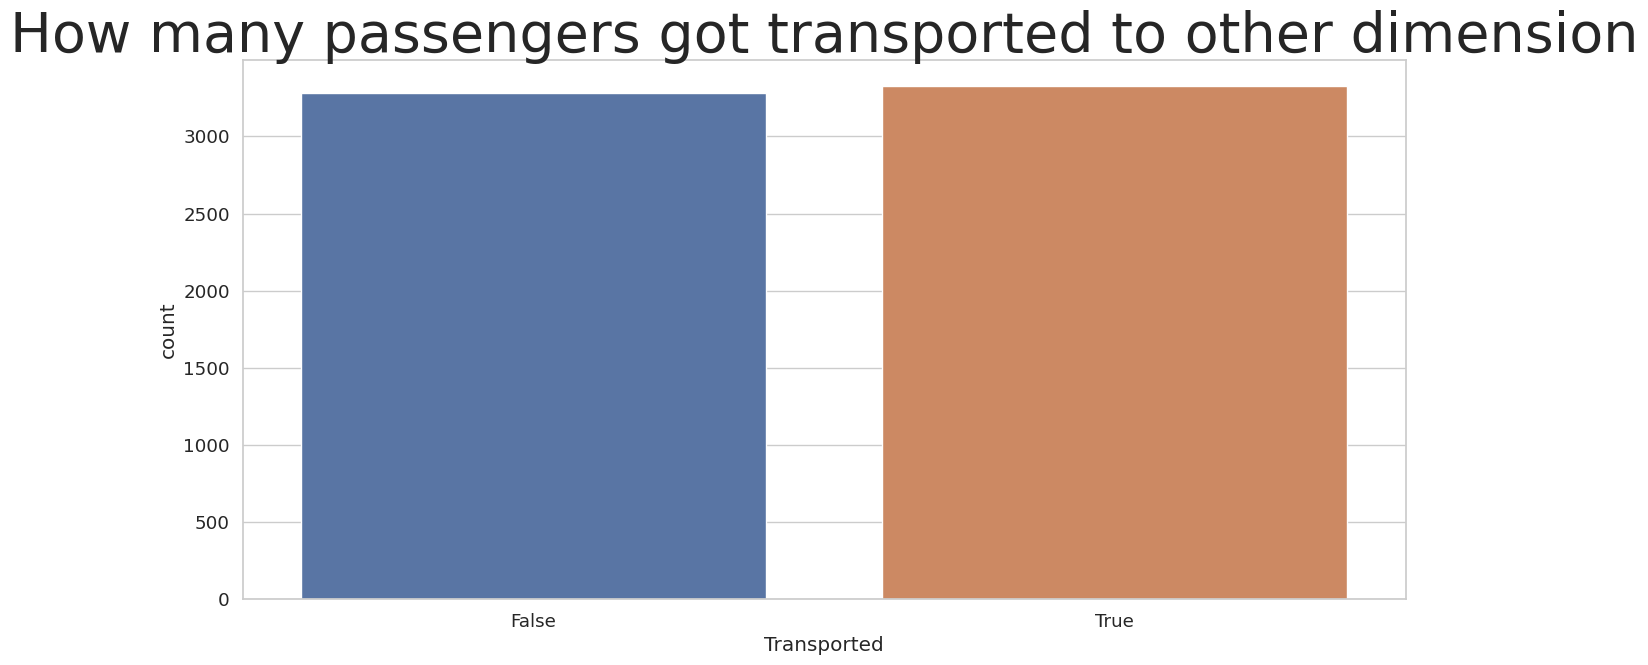

In [515]:
sns.countplot(df['Transported'])
plt.title('How many passengers got transported to other dimension', fontsize= 40)

Text(0.5, 1.0, 'How many passengers are VIP')

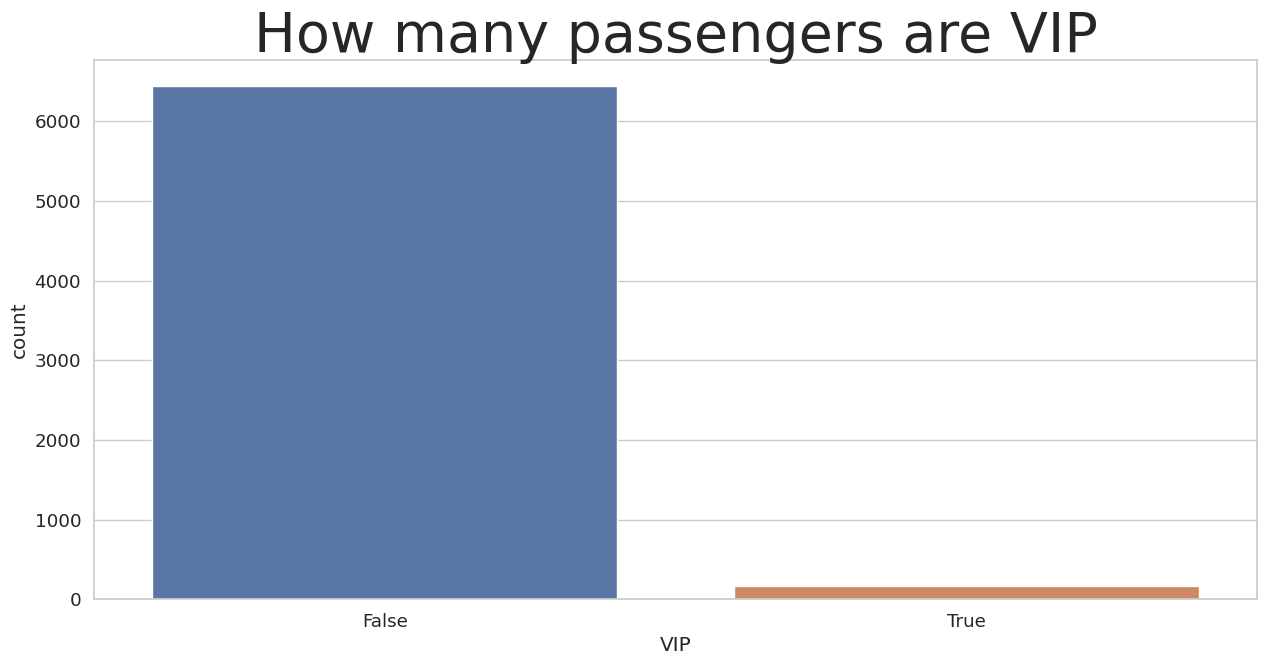

In [516]:
sns.countplot(df['VIP'])
plt.title('How many passengers are VIP', fontsize= 40)

Text(0.5, 1.0, 'Distribution of passengers age')

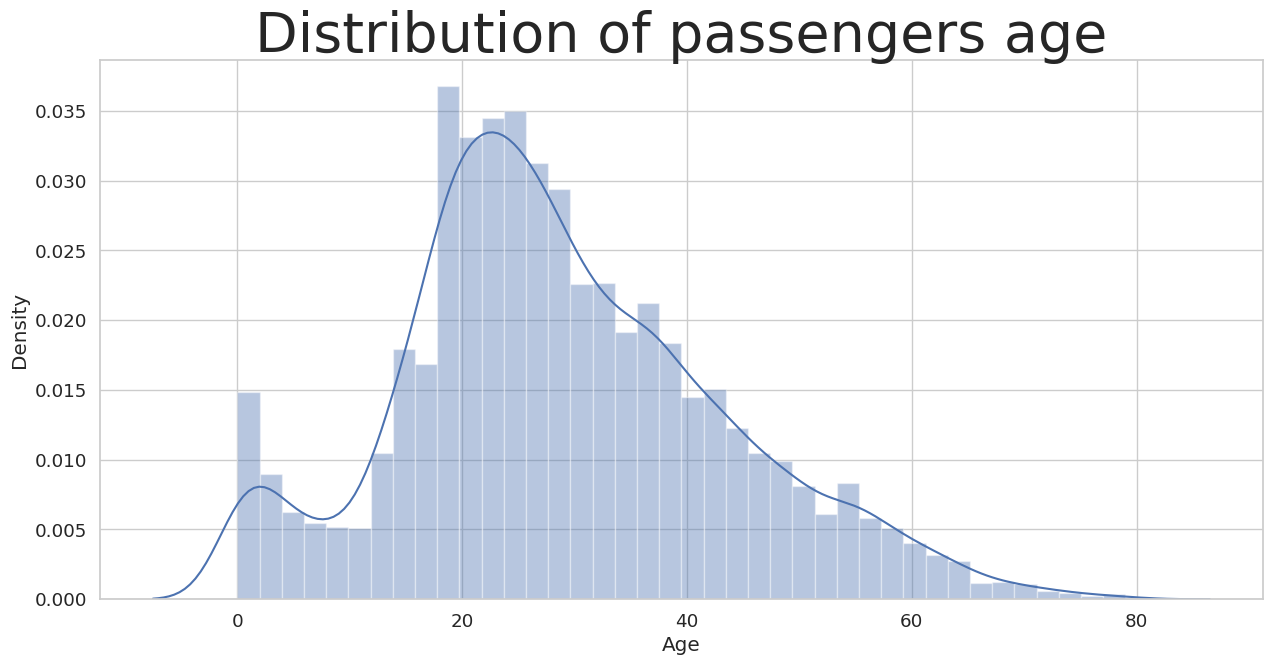

In [517]:
sns.distplot(df['Age'], kde= True)
plt.title('Distribution of passengers age', fontsize= 40)

Text(0.5, 1.0, 'How age affect transport rate')

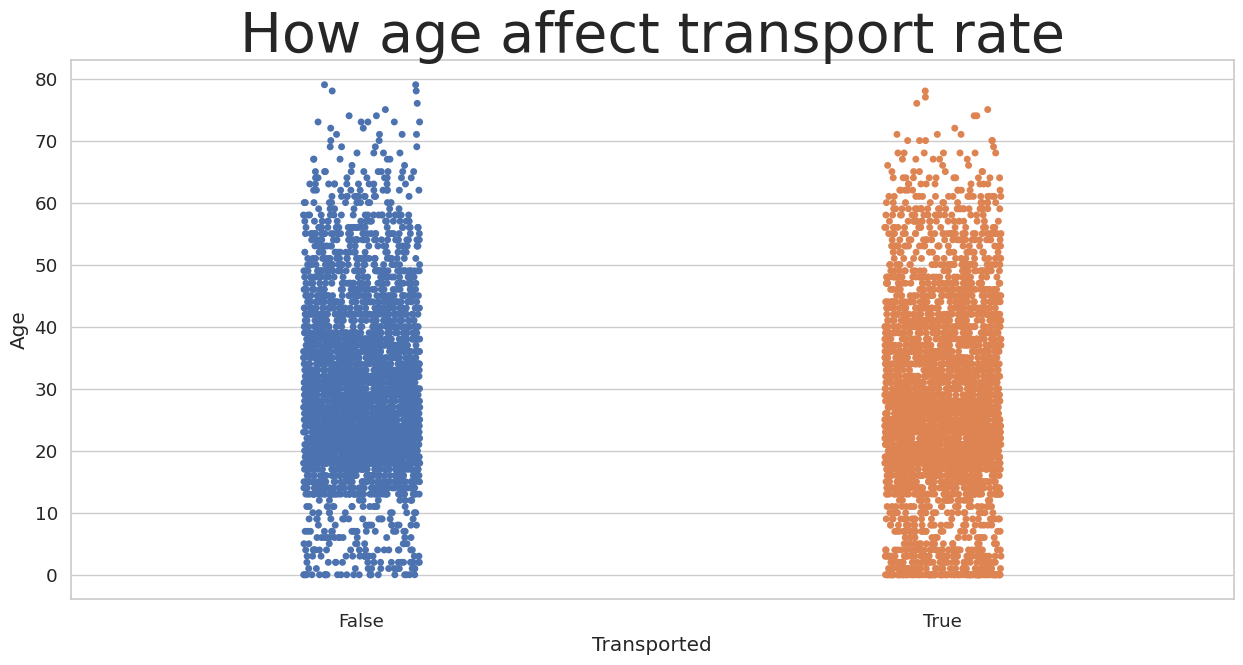

In [518]:
sns.stripplot(x= 'Transported', y= 'Age', data= df)
plt.title('How age affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How VIP status affect transport rate')

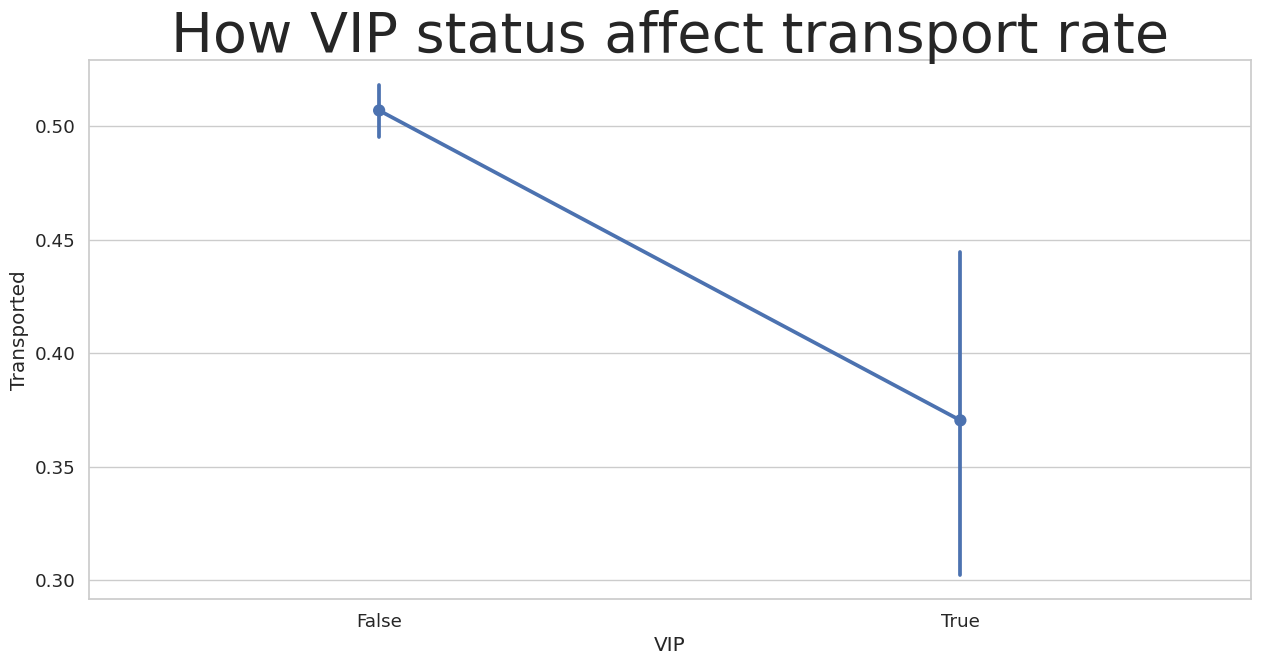

In [519]:
sns.pointplot(x= 'VIP', y= 'Transported', data= df)
plt.title('How VIP status affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How room service fee afect transport rate')

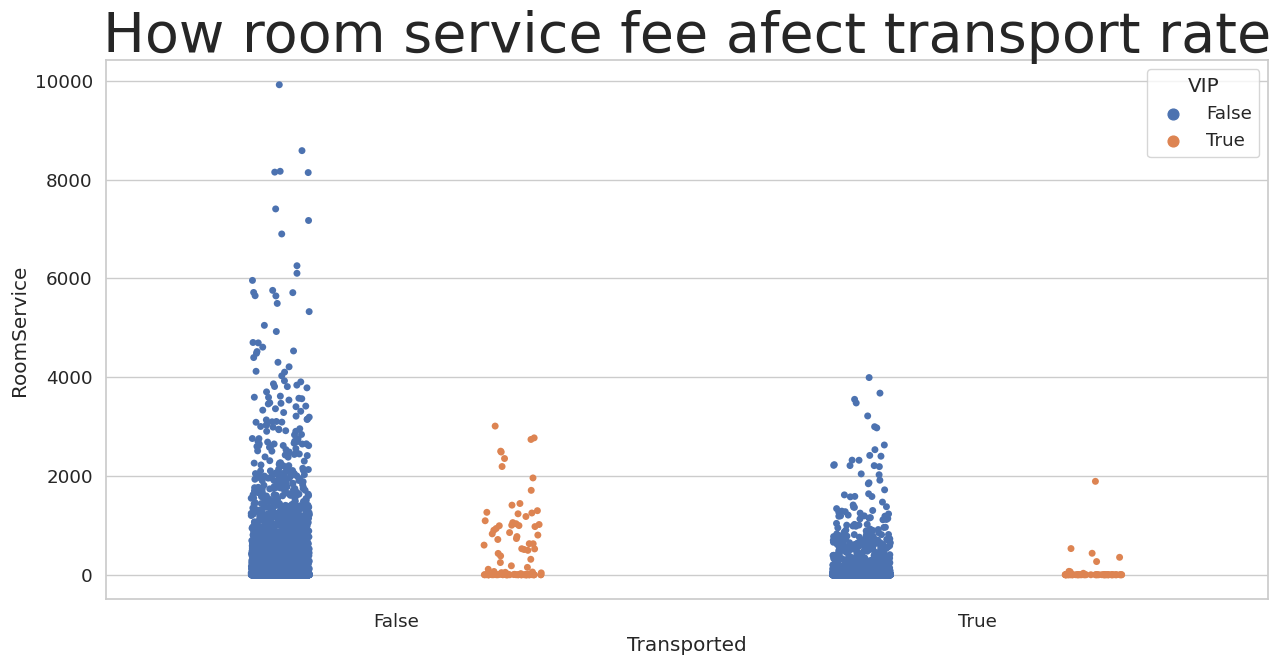

In [520]:
sns.stripplot(df['Transported'], df['RoomService'], hue= df['VIP'], dodge= True)
plt.title('How room service fee afect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How Food court fee affect Transport rate')

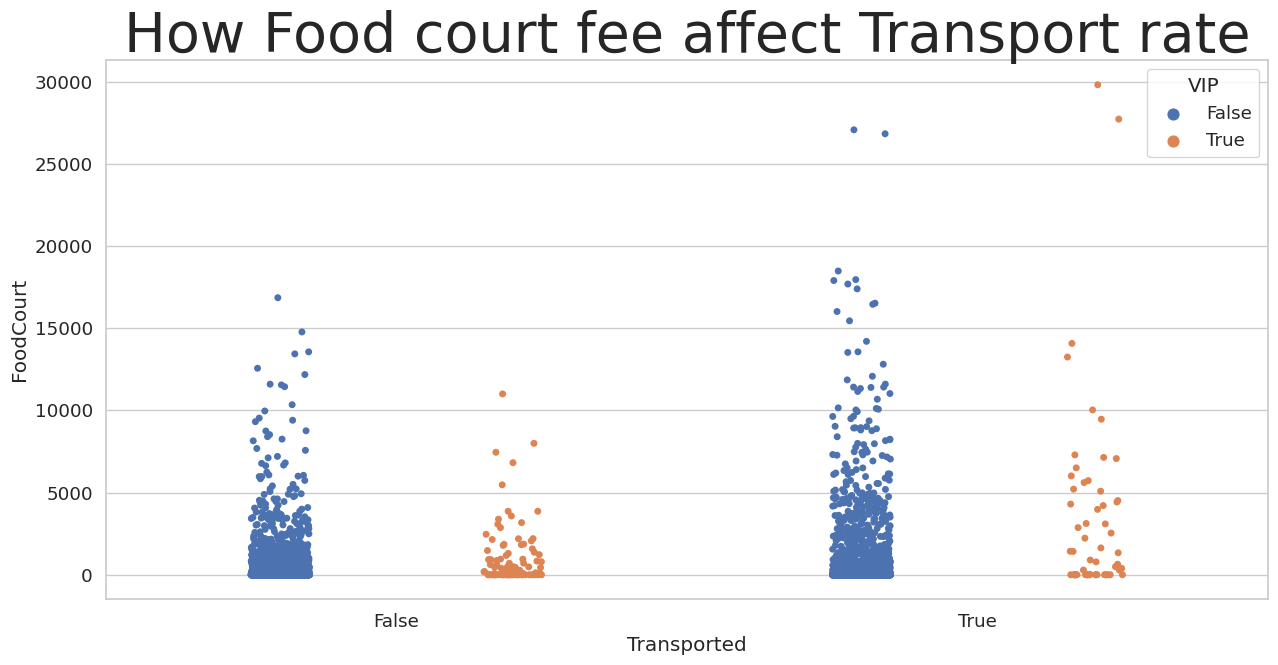

In [521]:
sns.stripplot(df['Transported'], df['FoodCourt'], hue= df['VIP'], dodge= True)
plt.title('How Food court fee affect Transport rate', fontsize= 40)

Text(0.5, 1.0, 'How shopping mall fee affect transport rate')

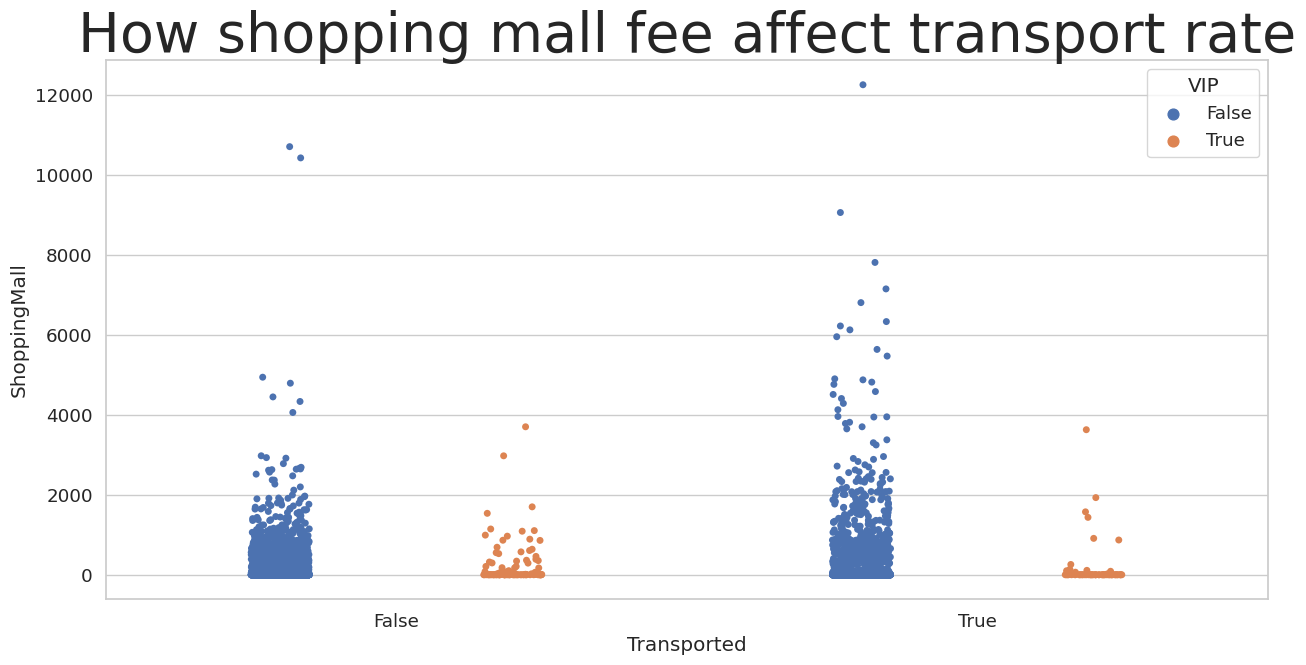

In [522]:
sns.stripplot(df['Transported'], df['ShoppingMall'], hue= df['VIP'], dodge= True)
plt.title('How shopping mall fee affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How Cryosleep affect Transport rate')

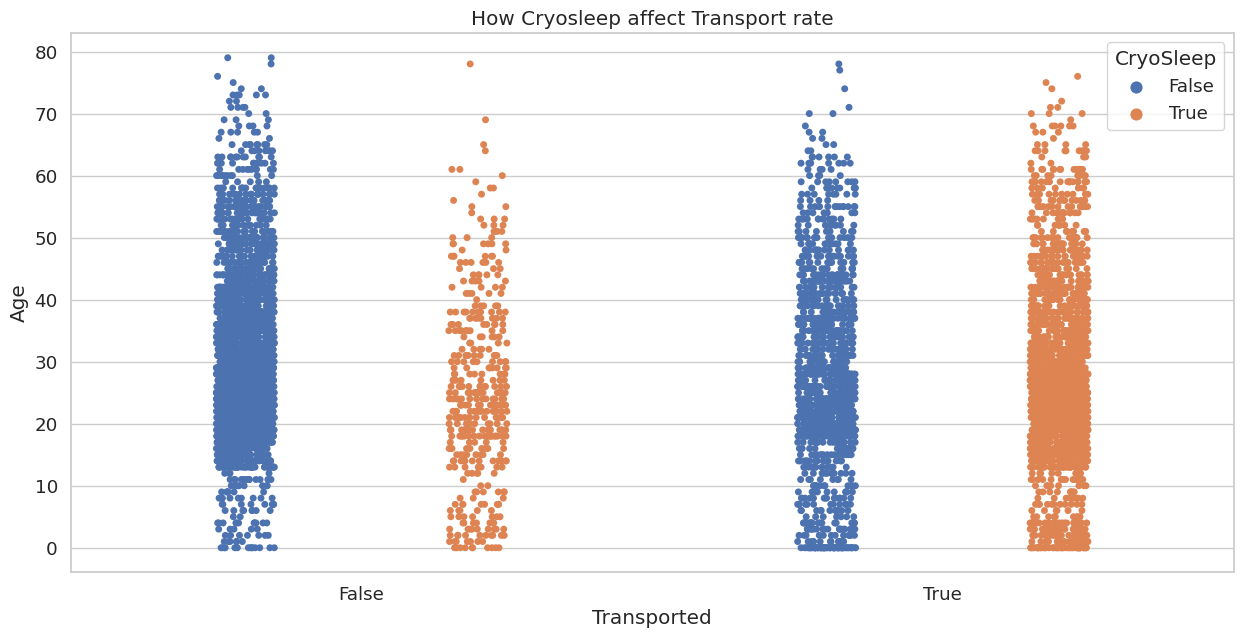

In [523]:
sns.stripplot(df['Transported'], df['Age'], hue= df['CryoSleep'], dodge= True)
plt.title('How Cryosleep affect Transport rate')

In [524]:
mask = np.triu(np.ones_like(df.corr().abs()))

Text(0.5, 1.0, 'Correlation between values')

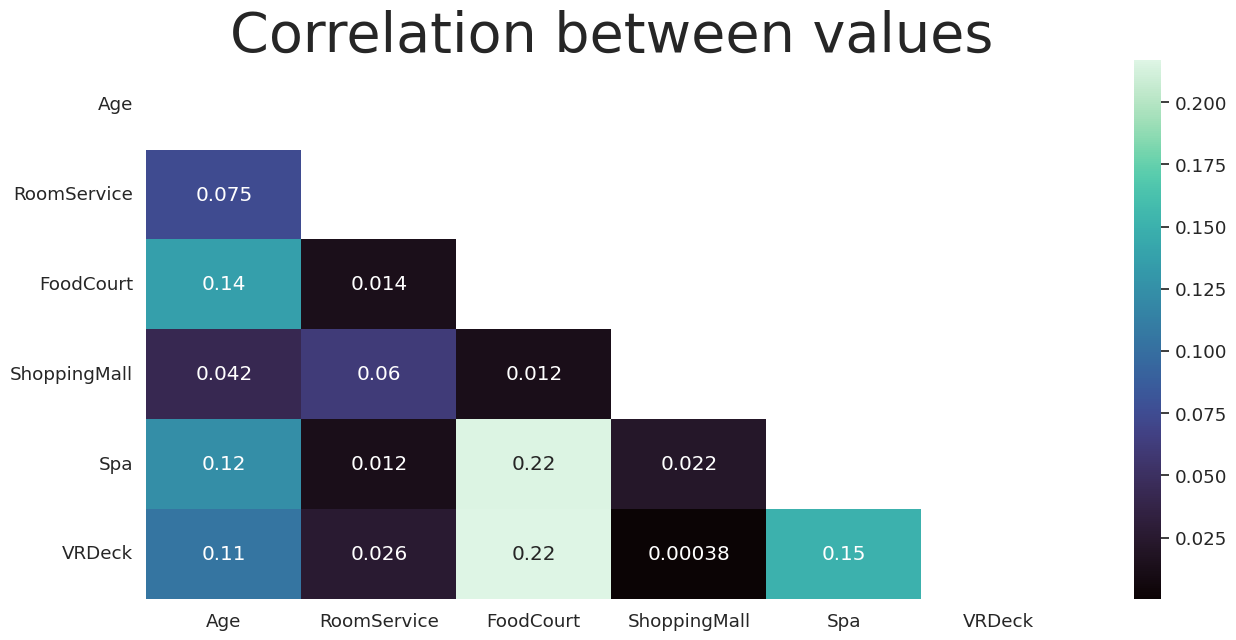

In [525]:
sns.heatmap(df.corr().abs(), cmap= 'mako', annot= True, mask= mask)
plt.title('Correlation between values', fontsize= 40)

## Feature Engineering

### Make different fee values into small, high, medium

In [526]:
df['RoomService'].describe()

count    6606.000000
mean      222.991674
std       644.987936
min         0.000000
25%         0.000000
50%         0.000000
75%        49.000000
max      9920.000000
Name: RoomService, dtype: float64

In [527]:
def rs_fee(x):
    if x <= 222:
        return 0
    elif x > 222 and x <= 644:
        return 1
    else:
        return 2

In [528]:
df['RoomService'] = df['RoomService'].apply(rs_fee)

In [529]:
df['FoodCourt'].describe()

count     6606.000000
mean       478.958523
std       1678.592291
min          0.000000
25%          0.000000
50%          0.000000
75%         82.750000
max      29813.000000
Name: FoodCourt, dtype: float64

In [530]:
def fc_fee(x):
    if x <= 478:
        return 0
    elif x > 478 and x <= 1678:
        return 1
    else:
        return 2

In [531]:
df['FoodCourt'] = df['FoodCourt'].apply(fc_fee)

In [532]:
df['ShoppingMall'].describe()

count     6606.000000
mean       178.356494
std        576.328407
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max      12253.000000
Name: ShoppingMall, dtype: float64

In [533]:
def sm_fee(x):
    if x <= 178:
        return 0
    elif x > 178 and x <= 576:
        return 1
    else:
        return 2

In [534]:
df['ShoppingMall'] = df['ShoppingMall'].apply(sm_fee)

In [535]:
df['Spa'].describe()

count     6606.000000
mean       313.161520
std       1144.016291
min          0.000000
25%          0.000000
50%          0.000000
75%         65.000000
max      22408.000000
Name: Spa, dtype: float64

In [536]:
def sp_fee(x):
    if x <= 313:
        return 0
    elif x > 313 and x <= 1114:
        return 1
    else:
        return 2

In [537]:
df['Spa'] = df['Spa'].apply(sp_fee)

In [538]:
df['VRDeck'].describe()

count     6606.000000
mean       303.780048
std       1127.142166
min          0.000000
25%          0.000000
50%          0.000000
75%         52.000000
max      20336.000000
Name: VRDeck, dtype: float64

In [539]:
def vr_fee(x):
    if x <= 303:
        return 0
    elif x > 303 and x <= 1127:
        return 1
    else:
        return 2

In [540]:
df['VRDeck'] = df['VRDeck'].apply(vr_fee)

### Make True and false variables to be bool not object

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   int64  
 8   FoodCourt     6606 non-null   int64  
 9   ShoppingMall  6606 non-null   int64  
 10  Spa           6606 non-null   int64  
 11  VRDeck        6606 non-null   int64  
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 774.1+ KB


In [543]:
df = df.astype({
    'CryoSleep': np.bool8,
    'VIP': np.bool8,
    'Transported': np.bool8
})

In [545]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3408,3668_01,Europa,True,C/120/P,55 Cancri e,41.0,False,0,0,0,0,0,Beide Crakenecal,True
2182,2336_02,Europa,False,A/30/S,TRAPPIST-1e,44.0,True,2,1,0,2,2,Wezna Fulatorly,False
1186,1258_01,Europa,False,A/10/P,55 Cancri e,30.0,False,0,2,1,2,2,Tauva Cowsearney,False
1191,1264_01,Earth,False,E/79/P,TRAPPIST-1e,51.0,False,0,0,0,0,1,Franda Roberrenn,False
8105,8658_01,Mars,False,E/568/S,TRAPPIST-1e,49.0,False,0,0,2,0,0,Ney Forne,True
